In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros([n_h, 1])
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros([n_y, 1])
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

In [4]:
def forwardpass(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.maximum(0,Z1)       # ReLU
    Z2 = np.dot(W2, A1) + b2
    A2 = 1/(1+np.exp(-Z2))      # Sigmoid
    
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

In [5]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1]   # number of calss
    
    #cost = - np.sum(np.multiply(np.log(A2), Y) + np.multiply(1-Y, np.log(1-A2))) / m
    cost = (1./m) * (-np.dot(Y,np.log(A2).T) - np.dot(1-Y, np.log(1-A2).T))
    
    cost = np.squeeze(cost)  # makes sure cost is the dimension we expect.
    return cost

In [6]:
def backwardpass(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    
    dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
    
    temp_s = 1/(1+np.exp(-Z2))
    dZ2 = dA2 * temp_s * (1-temp_s)        # Sigmoid (back propagation)
    
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T,dZ2)
    
    # ReLU (back propagation)
    dZ1 = np.array(dA1, copy=True) # just converting dz to a correct object.
    dZ1[Z1 <= 0] = 0   # When z <= 0, you should set dz to 0 as well. 
    
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

In [7]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

In [8]:
def nn_model(X, Y, n_h, num_iterations = 5000, learning_rate=0.08, print_cost = False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    costs = []
    
    np.random.seed(1)
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    # Initialize W1, b1, W2, b2
    parameters = initialize_parameters(n_x, n_h, n_y)
    #print("W1.shape: " + str(parameters["W1"].shape))
    #print("W2.shape: " + str(parameters["W2"].shape))
    for i in range(0, num_iterations):
        A2, cache = forwardpass(X, parameters)
        #print("Z1.shape: " + str(cache["Z1"].shape))
        #print("A1.shape: " + str(cache["A1"].shape))
        #print("Z2.shape: " + str(cache["Z2"].shape))
        #print("A2.shape: " + str(cache["A2"].shape))
        cost = compute_cost(A2, Y, parameters)
        grads = backwardpass(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % 500 == 0:
            costs.append(cost)
            if print_cost:
                print("Cost after iteration {}: {}".format(i, cost))
    # The latest iteration.
    print("Cost after iteration {}: {}".format(i, cost))
    costs.append(cost)
    
    plt.figure(num=1, figsize=(8,5))
    plt.semilogy(costs)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Learning Rate = " + str(learning_rate))
    plt.show()
 
    return parameters

In [9]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = forwardpass(X, parameters)
 
    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [10]:
def predict_t(X, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = forwardpass(X, parameters)
 
    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
        
    return p

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import torch
from tensorflow.keras.layers import Dropout
from tensorflow.keras import utils
data = pd.read_csv('./train.csv', encoding = 'big5')

In [12]:
n = data.shape[0]
a = data.iloc[:,2].to_numpy().reshape(n,1)
b = data.iloc[:,4:8].to_numpy()

c = data.iloc[:,9].to_numpy().reshape(n,1)
cabin = data.iloc[:,10].to_numpy().reshape(n,1)

for j in range(cabin.shape[0]):
    if cabin[j,0] is not np.nan:
        cabin[j,0] = 2
    else:
        cabin[j,0] = 1
    

d = data.iloc[:,11].to_numpy().reshape(n,1)
train_label = data.iloc[:,1]

train = np.concatenate([a,b,c,cabin,d],axis = 1)
train[train == 'male'] = 1
train[train == 'female'] = 2
train[train == 'S'] = 1
train[train == 'C'] = 2
train[train == 'Q'] = 3

train = train.astype ('float32')

for i in range(train.shape[1]):
    col = train[:,i]
    col[np.isnan(col)] = 1
    
train_label = train_label.to_numpy()
train_label = train_label.astype ('float32').reshape(1,-1)

print(train)
print(train.T.shape)
print(train_label.shape)
print(train_label.shape)

[[ 3.      1.     22.     ...  7.25    1.      1.    ]
 [ 1.      2.     38.     ... 71.2833  2.      2.    ]
 [ 3.      2.     26.     ...  7.925   1.      1.    ]
 ...
 [ 3.      2.      1.     ... 23.45    1.      1.    ]
 [ 1.      1.     26.     ... 30.      2.      2.    ]
 [ 3.      1.     32.     ...  7.75    1.      3.    ]]
(8, 891)
(1, 891)
(1, 891)


Cost after iteration 0: 0.6925302652297207
Cost after iteration 500: 0.6161136788650186
Cost after iteration 1000: 0.5877191213047265
Cost after iteration 1500: 0.5329206198067657
Cost after iteration 2000: 0.5187974394696934
Cost after iteration 2500: 0.5438046775927035
Cost after iteration 3000: 0.5365797554195458
Cost after iteration 3500: 0.49107535900492927
Cost after iteration 4000: 0.4724425236591559
Cost after iteration 4500: 0.5249216289919635
Cost after iteration 4999: 0.4587179725451735


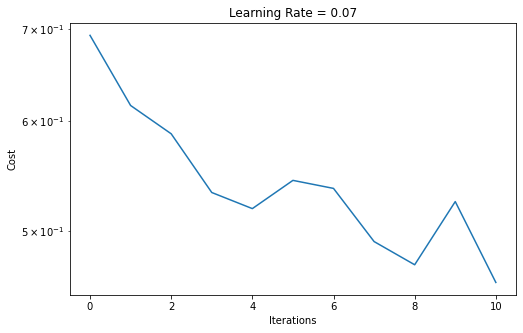

In [13]:
parameters_bp = nn_model(train.T, train_label, 12, num_iterations=5000, learning_rate=0.07, print_cost=True)

In [14]:
print("Training accuracy:")
predictions_train = predict(train.T, train_label, parameters_bp)

Training accuracy:
Accuracy: 0.8114478114478114


In [15]:
test_data = pd.read_csv('./test.csv', encoding = 'big5')
m = test_data.shape[0]
a = test_data.iloc[:,1].to_numpy().reshape(m,1)
b = test_data.iloc[:,3:7].to_numpy()

c = test_data.iloc[:,8].to_numpy().reshape(m,1)
cabin = test_data.iloc[:,9].to_numpy().reshape(m,1)

for j in range(cabin.shape[0]):
    if cabin[j,0] is not np.nan:
        cabin[j,0] = 2
    else:
        cabin[j,0] = 1
    

d = test_data.iloc[:,10].to_numpy().reshape(m,1)

test = np.concatenate([a,b,c,cabin,d],axis = 1)
test[test == 'male'] = 1
test[test == 'female'] = 2
test[test == 'S'] = 1
test[test == 'C'] = 2
test[test == 'Q'] = 3

test = test.astype ('float32')

for i in range(test.shape[1]):
    col = test[:,i]
    col[np.isnan(col)] = 1
    
print(test.shape)
print(test)

(418, 8)
[[ 3.      1.     34.5    ...  7.8292  1.      3.    ]
 [ 3.      2.     47.     ...  7.      1.      1.    ]
 [ 2.      1.     62.     ...  9.6875  1.      3.    ]
 ...
 [ 3.      1.     38.5    ...  7.25    1.      1.    ]
 [ 3.      1.      1.     ...  8.05    1.      1.    ]
 [ 3.      1.      1.     ... 22.3583  1.      2.    ]]


In [16]:
a3,cache = forwardpass(test.T,parameters_bp)
p = predict_t(test.T,parameters_bp)
print(p)

[[0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
  1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.
  1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
  0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0.
  1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
  1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.
  0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0.
  1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.
  0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
  1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.
  1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
  0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
  0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0.
  0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 

In [17]:
pid = test_data.iloc[:,0].to_numpy()
print(pid)
print(pid[0])
pid0 = int(pid[0])
pid_n = int(pid.shape[0])
import csv
with open('submit.csv', mode='w', newline='') as submit_file:
    csv_writer = csv.writer(submit_file)
    header = ['PassengerId', 'Survived']
    print(header)
    csv_writer.writerow(header)
    for i in range(pid_n):
        row =  [str(pid_n), int(p[0][i])]
        csv_writer.writerow(row)
        print(row)

[ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087
 1088 